In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_berlin_gw50m.csv")
df

,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642)",Unnamed: 1,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).1",Unnamed: 3,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).2",Unnamed: 5,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).3",Unnamed: 7,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).4",Unnamed: 9,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).5",Unnamed: 11,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).6",Unnamed: 13,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).7",Unnamed: 15,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).8",Unnamed: 17,"Vector of RSSI per node LoRaNetwork.networkServer.app[0] ($0=""avg"", #0 - General-0-20230503-15:41:21-12642).9",Unnamed: 19
0,552.770621,-76.196749,788.923274,-62.450831,797.596637,-67.847858,900.282520,-63.322360,924.945266,-64.749866,978.728558,-68.388331,1257.652892,-58.819388,1861.326344,-74.736987,1880.686186,-66.554524,1953.267470,-76.462575
1,553.970621,-76.196749,790.123274,-62.450831,798.796637,-67.847858,901.482520,-63.322360,926.145266,-64.749866,979.928558,-68.388331,1258.852892,-58.819388,1862.526344,-74.736987,1881.886186,-66.554524,1954.467470,-76.462575
2,1592.129922,-80.996251,1542.797385,-59.305918,2586.284301,-69.944421,2418.018497,-59.531991,1461.710986,-70.531470,1941.309497,-61.264569,1833.385299,-60.130019,2575.109937,-73.699319,2327.305648,-69.682011,2279.807886,-65.495670
3,2568.993996,-74.643379,2600.623799,-76.733389,3230.389011,-74.768404,3436.677227,-70.338360,2850.753673,-80.646590,2774.153015,-60.251118,2919.654680,-60.319945,3462.971348,-85.384646,3543.814302,-65.795623,2787.008007,-77.727781
4,4025.812555,-76.824851,4708.071404,-73.758725,7011.329969,-68.591895,3624.196178,-59.770648,4690.486458,-72.639928,6246.688495,-65.257439,4921.641175,-70.541670,4993.802574,-73.468841,4680.410797,-62.231884,3088.573922,-62.271247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845373.833011,-57.691774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845824.284168,-56.988265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851453.236801,-59.088313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,853396.687452,-59.076164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# rssi_berlin_gw50m.csv
locations = [[822.0194698360865, 739.4046194171533, 23], [263.9939801048604, 299.80550314765424, 23], [468.6109037408023, 606.6390164084733, 23], [677.377121595724, 311.6158274188638, 5.1], [734.4841017249855, 487.4600875368342, 23], [714.6851075206068, 205.09913122281432, 19], [403.5160410553799, 136.8531596083194, 23], [220.07116886903532, 212.38414978329092, 23], [108.28748674801318, 581.6178667871282, 19], [511.31633024220355, 295.69291112665087, 23]]
distances = [485.6602346597765, 228.03577472104752, 183.39949937801595, 256.69942710462936, 290.3508396533533, 344.6181358251887, 294.42416609958434, 316.4675562732822, 378.57127760749836, 145.69613736832235]

initial_node_order = ['node0', 'node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9']
conditions = pd.DataFrame(distances, index=initial_node_order)
conditions

,0
node0,485.660235
node1,228.035775
node2,183.399499
node3,256.699427
node4,290.350840
node5,344.618136
node6,294.424166
node7,316.467556
node8,378.571278
node9,145.696137


In [3]:
df_count = pd.read_csv("../results/count_berlin_gw50m.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 0,541
1,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 1,565
2,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 2,581
3,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 3,607
4,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 4,629
5,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 5,641
6,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 6,661
7,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 7,677
8,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 8,698
9,General-0-20230503-15:41:21-12642,0,LoRaNetwork.networkServer.app[0],numReceivedFromNode 9,725


In [4]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node8', 'node6', 'node0', 'node1', 'node4', 'node9', 'node2', 'node3', 'node7', 'node5']


In [5]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
print(rssi_values.head())

       node8      node6      node0      node1      node4      node9  \
0 -76.196749 -62.450831 -67.847858 -63.322360 -64.749866 -68.388331   
1 -76.196749 -62.450831 -67.847858 -63.322360 -64.749866 -68.388331   
2 -80.996251 -59.305918 -69.944421 -59.531991 -70.531470 -61.264569   
3 -74.643379 -76.733389 -74.768404 -70.338360 -80.646590 -60.251118   
4 -76.824851 -73.758725 -68.591895 -59.770648 -72.639928 -65.257439   

       node2      node3      node7      node5  
0 -58.819388 -74.736987 -66.554524 -76.462575  
1 -58.819388 -74.736987 -66.554524 -76.462575  
2 -60.130019 -73.699319 -69.682011 -65.495670  
3 -60.319945 -85.384646 -65.795623 -77.727781  
4 -70.541670 -73.468841 -62.231884 -62.271247  


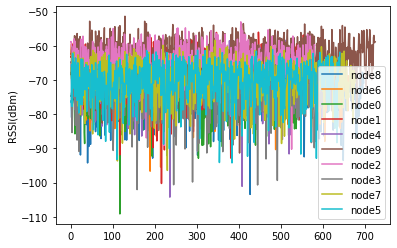

In [6]:
# rssi_values.plot.line()
plt.figure(facecolor="white")
plt.plot(rssi_values)
plt.legend(rssi_values)
plt.ylabel("RSSI(dBm)")
plt.show()

<AxesSubplot:ylabel='Frequency'>

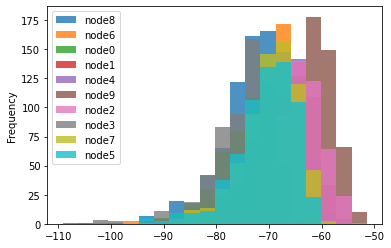

In [7]:
rssi_values.plot.hist(bins=20, alpha=0.8)

<AxesSubplot:>

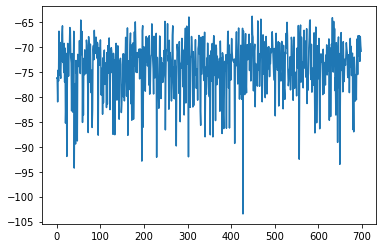

In [8]:
rssi_values["node8"].plot.line()

<AxesSubplot:ylabel='Frequency'>

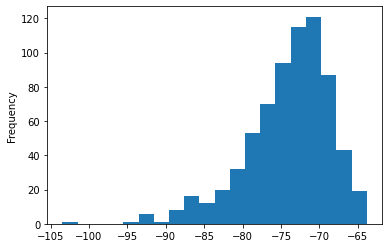

In [9]:
rssi_values["node8"].plot.hist(bins=20)

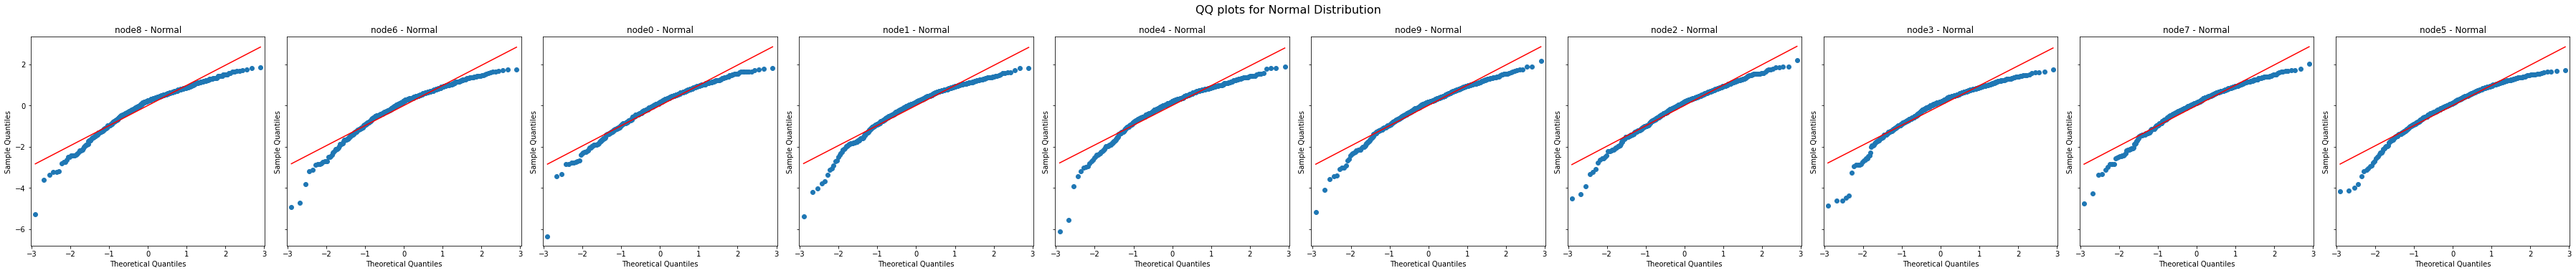

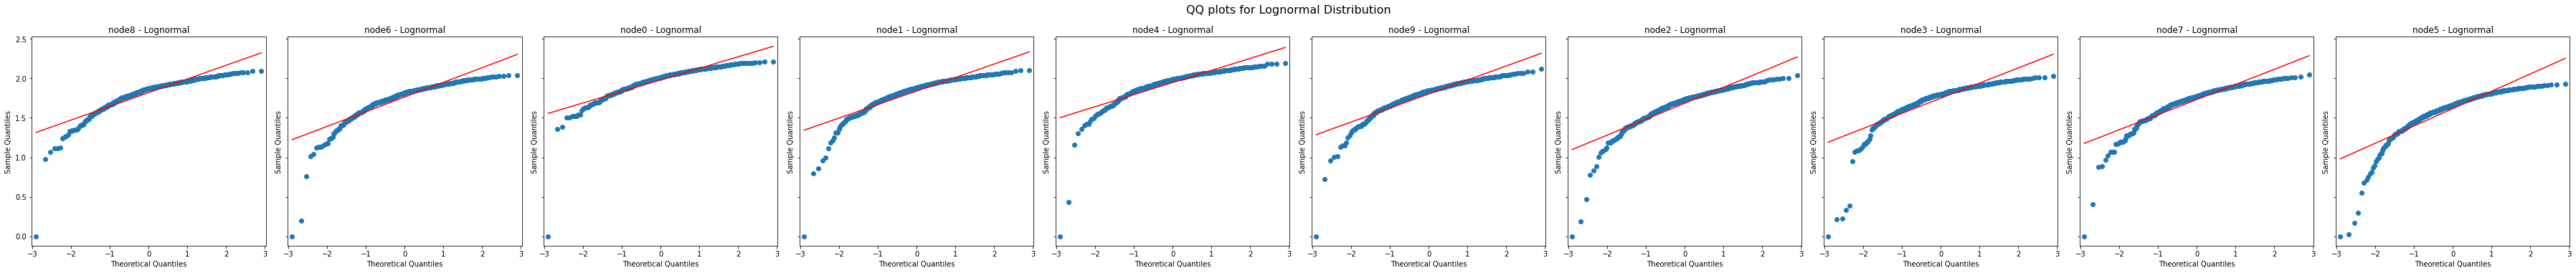

In [10]:
def plot_qq_statsmodels_horizontal(data, distribution_type):
    fig, ax = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5), sharey=True)
    for idx, column in enumerate(data.columns):
        if distribution_type == "normal":
            sm.qqplot(data[column], line="r", ax=ax[idx])
        elif distribution_type == "lognormal":
            sm.qqplot(np.log(data[column] - data[column].min() + 1), line="r", ax=ax[idx])
        ax[idx].set_title(f"{column} - {distribution_type.capitalize()}")

    plt.tight_layout()
    plt.suptitle(f"QQ plots for {distribution_type.capitalize()} Distribution", fontsize=16, y=1.05)
    plt.show()


cleaned_rssi_values = rssi_values.dropna()
scaler = StandardScaler()
normalized_rssi_values = pd.DataFrame(scaler.fit_transform(cleaned_rssi_values), columns=cleaned_rssi_values.columns)


plot_qq_statsmodels_horizontal(normalized_rssi_values, "normal")
plot_qq_statsmodels_horizontal(normalized_rssi_values, "lognormal")


- norm dist because there is no multipath  
- the reason left end is above the line is that we cannot detect signal below -130dBm  

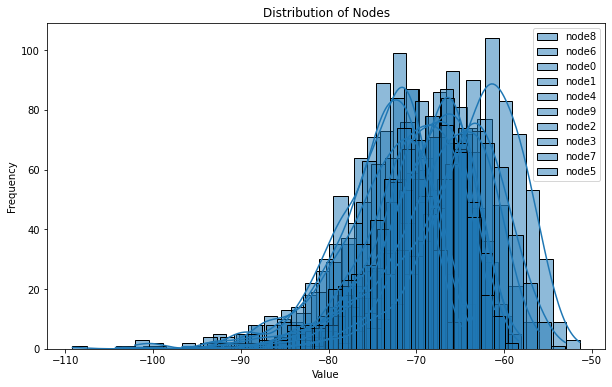

In [11]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms or KDE plots for each node
for column in rssi_values.columns:
    sns.histplot(rssi_values[column], kde=True, ax=ax, label=column)

# Customize the plot
ax.set_title("Distribution of Nodes")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

# Display the plot
plt.show()

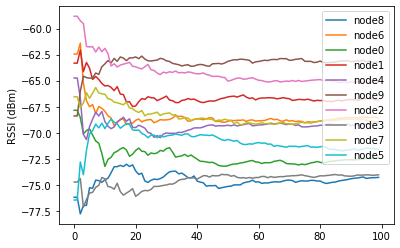

In [12]:
# Calculate the cumulative sum for each column
cumulative_sum = rssi_values.cumsum()

# Calculate the cumulative count for each column
cumulative_count = rssi_values.apply(lambda x: (x.notna().cumsum()))

# Compute the average value for each element by dividing cumulative sum by cumulative count
average_df = cumulative_sum / cumulative_count

# Display the new DataFrame with the average values
plt.figure(facecolor="white")
plt.plot(average_df[:100])
plt.legend(average_df,loc='upper right')
plt.ylabel("RSSI (dBm)")
plt.show()
# average_df.plot.line()

         distance       rssi
node0  485.660235 -73.547747
node1  228.035775 -67.259812
node2  183.399499 -65.272204
node3  256.699427 -74.734544
node4  290.350840 -68.843236
node5  344.618136 -70.712996
node6  294.424166 -69.146596
node7  316.467556 -69.705257
node8  378.571278 -74.093468
node9  145.696137 -63.182247


<AxesSubplot:xlabel='distance', ylabel='rssi'>

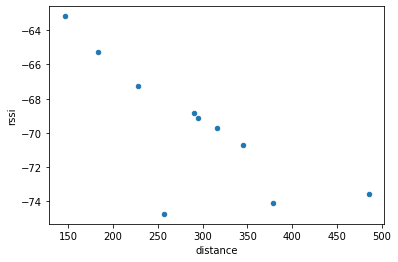

In [13]:
mean_rssi = pd.DataFrame(rssi_values.mean())
rssi_distance = pd.merge(conditions, mean_rssi, left_index=True, right_index=True)
rssi_distance.columns = ["distance", "rssi"]
print(rssi_distance)
rssi_distance.plot.scatter(x="distance",y="rssi")

{'node0': 485.6602346597765, 'node1': 228.03577472104752, 'node2': 183.39949937801595, 'node3': 256.69942710462936, 'node4': 290.3508396533533, 'node5': 344.6181358251887, 'node6': 294.42416609958434, 'node7': 316.4675562732822, 'node8': 378.57127760749836, 'node9': 145.69613736832235}
node8
node6
node0
node1
node4
node9
node2
node3
node7
node5


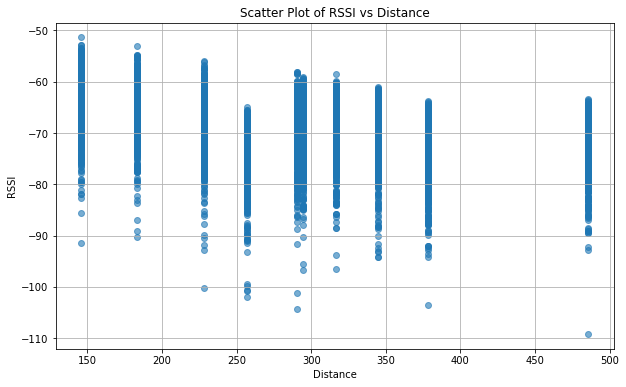

In [14]:
# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()
print(node_to_distance)

# Create an empty array to store x (distance) and y (rssi) values for the scatter plot
x_values = []
y_values = []

# Iterate through the columns (nodes) in rssi_values
for node in rssi_values.columns:
    # Get the distance for the current node
    print(node)
    distance = node_to_distance[node]
    
    # Get the rssi values for the current node
    rssi_values_node = rssi_values[node].dropna()
    
    # Append the distance value to x_values as many times as there are rssi values
    x_values.extend([distance] * len(rssi_values_node))
    
    # Append the rssi values to y_values
    y_values.extend(rssi_values_node)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.6)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Scatter Plot of RSSI vs Distance")

# Optionally, you can add a grid for better readability
plt.grid(True)

# Finally, display the plot
plt.show()



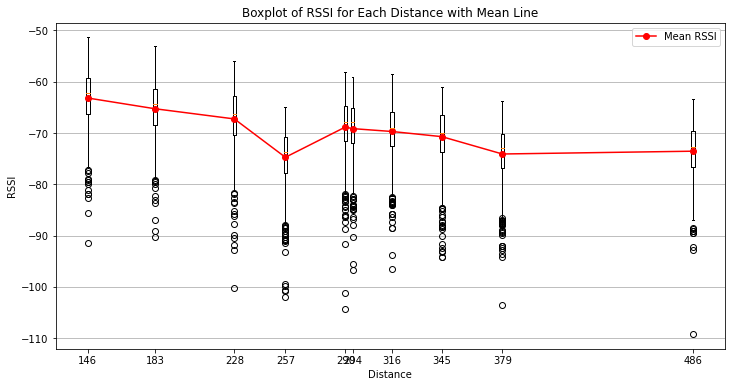

In [15]:
# Create a list of node names
node_names = rssi_values.columns

# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()

# Create a list of distances corresponding to the node names
distances_list = [node_to_distance[node] for node in node_names]

# Initialize an empty list to store the data for box plots
box_plot_data = []

# Add the RSSI values for each node to the box_plot_data list
for node in node_names:
    box_plot_data.append(rssi_values[node].dropna().tolist())

# Create custom ticks and labels for the x-axis
xticks = distances_list
xticklabels = [int(round(dist)) for dist in xticks]

# Calculate the mean RSSI for each node
mean_rssi_values = [np.mean(rssi) for rssi in box_plot_data]

# Sort the data by distances
sorted_data = sorted(zip(distances_list, box_plot_data, mean_rssi_values))
sorted_distances, sorted_box_plot_data, sorted_mean_rssi_values = zip(*sorted_data)

# Create a box plot for each node with distance on the x-axis
plt.figure(figsize=(12, 6), facecolor="white")
plt.boxplot(sorted_box_plot_data, positions=sorted_distances, widths=2)

# Set custom ticks and labels for the x-axis
sorted_xticks = sorted(xticks)
sorted_xticklabels = [str(int(round(d))) for d in sorted_xticks]
plt.xticks(sorted_xticks, sorted_xticklabels)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Boxplot of RSSI for Each Distance with Mean Line")

# Optionally, you can add a grid for better readability
plt.grid(axis='y')

# Plot a line connecting the mean RSSI values for each node
plt.plot(sorted_distances, sorted_mean_rssi_values, marker='o', linestyle='-', color='red', label='Mean RSSI')

# Add a legend to the plot
plt.legend()

# Finally, display the plot
plt.show()




In [16]:
print(mean_rssi_values)
print(distances_list)

[-74.09346777134435, -69.14659573310989, -73.54774707124032, -67.2598116355535, -68.84323573826707, -63.18224654815296, -65.27220428570674, -74.73454353002585, -69.70525715798875, -70.71299630957999]
[378.57127760749836, 294.42416609958434, 485.6602346597765, 228.03577472104752, 290.3508396533533, 145.69613736832235, 183.39949937801595, 256.69942710462936, 316.4675562732822, 344.6181358251887]


# prediction